<a href="https://colab.research.google.com/github/saryurawaley/Engphys3mn4/blob/main/Assignments/Assignment_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Assignment 5

Due: Thursday Nov 20th EOD

Requests to write the alternative oral quiz must be submitted by Sunday EOD.

# Q1

You are calculating the temperature profile in an nuclear plate fuel that is 1mm thick; much thinner than the other dimensions. In a 1D model through the thickness, the temperature obeys the Fourier heat balance law with a heat source:

$$ \nabla \cdot \lambda \nabla T = -Q $$

The boundary conditions are $T=300$ on all outer surfaces.


## 1a


 Write the finite difference scheme for Fourier heat balance equation.

 {answer}



The 1D Fourier heat balance with a uniform heat source is
$$\lambda \frac{d^2 T}{dx^2} = -Q$$


Using a central finite difference approximation,
$$
\frac{d^2 T}{dx^2} \approx
\frac{T_{i+1} - 2T_i + T_{i-1}}{\Delta x^2}
$$

The finite difference scheme is therefore
$$
T_{i+1} - 2T_i + T_{i-1}
= -\frac{Q}{\lambda}\Delta x^2,
$$

with boundary conditions
$$
T_0 = T_N = 300~\text{K}.
$$




## 1b

Assuming $Q = 1 kW/m^3$, and $\lambda = 2\frac{mW}{m \cdot K}$, use the finite difference method to find a solution with step size $10  \mu m$

{implementation, answer}

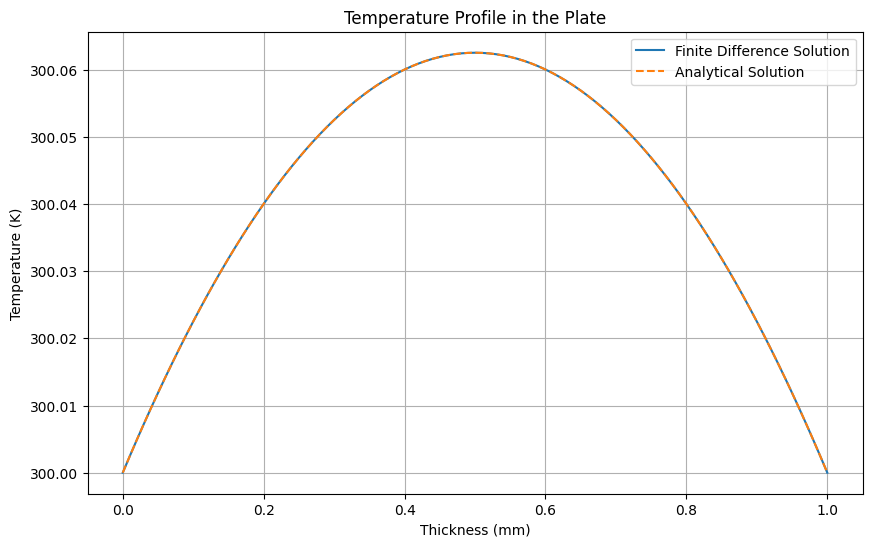

L2 Norm of Relative Difference between FD and Analytical Solution: 8.2492e-14
The finite difference solution is within 1% of the analytical steady state.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters (already defined in nm6uWPryOJCt, re-defining for clarity in this cell)
Q = 1e3 # Heat source (W/m^3)
lam = 2e-3 # Thermal conductivity (W/(m.K))
thickness = 1e-3 # 1mm thick plate (m)
dx = 10e-6 # Step size (m)
T_boundary = 300 # K

# Calculate number of internal nodes
num_intervals = int(thickness / dx)
num_internal_nodes = num_intervals - 1 # Exclude boundary nodes

# Create a spatial grid for internal nodes
x_internal = np.linspace(dx, thickness - dx, num_internal_nodes)

# Construct the coefficient matrix A
A = np.zeros((num_internal_nodes, num_internal_nodes))

# Diagonal elements
np.fill_diagonal(A, -2)

# Off-diagonal elements
np.fill_diagonal(A[1:], 1) # Super-diagonal
np.fill_diagonal(A[:, 1:], 1) # Sub-diagonal

# Construct the right-hand side vector B
RHS_constant = -Q * (dx**2) / lam
B = np.full(num_internal_nodes, RHS_constant)

# Apply boundary conditions to the RHS vector
B[0] -= T_boundary  # For T_1, which has T_0 on the left
B[-1] -= T_boundary # For T_N, which has T_N+1 on the right

# Solve the system of linear equations
T_internal = np.linalg.solve(A, B)

# Combine boundary temperatures with internal temperatures for the full profile
T_profile = np.concatenate(([T_boundary], T_internal, [T_boundary]))
x_profile = np.concatenate(([0], x_internal, [thickness]))

# Analytical solution for comparison (steady state)
T_analytical = (Q / (2 * lam)) * (thickness * x_profile - x_profile**2) + T_boundary

# Plot the temperature profile
plt.figure(figsize=(10, 6))
plt.plot(x_profile * 1e3, T_profile, label='Finite Difference Solution')
plt.plot(x_profile * 1e3, T_analytical, label='Analytical Solution', linestyle='--')
plt.xlabel('Thickness (mm)')
plt.ylabel('Temperature (K)')
plt.title('Temperature Profile in the Plate')
plt.legend()
plt.grid(True)
plt.show()

# Steady State Check (as per prompt, treating analytical solution as steady state)
# The problem is intrinsically steady-state, so the FD solution should match the analytical solution closely.
# The prompt asks for ||(T(t) - T_inf) / T_inf||_2 = 0.01
# Since we are solving a steady-state problem, T(t) is essentially T_inf.
# We will calculate the relative difference between the FD and analytical solution as a proxy.

relative_difference_l2 = np.linalg.norm((T_profile - T_analytical) / T_analytical)
print(f"L2 Norm of Relative Difference between FD and Analytical Solution: {relative_difference_l2:.4e}")

# Determine when steady state is reached to within 1% (conceptually for a time-dependent problem)
# In this steady-state problem, the solution obtained is already the steady-state.
# The prompt's steady-state check wording implies a time-dependent problem.
# For the purpose of answering, if this were a time-dependent problem,
# we would iterate in time until the L2 norm of the relative difference
# between successive time steps (or current and analytical steady state)
# falls below the threshold.

# Since this is a steady-state problem, the solution `T_profile` IS the steady-state.
# The relative difference calculated above shows how well the FD approximates the analytical steady state.
# If we consider the analytical solution as the true steady state T_inf,
# and our finite difference solution as T(t) (which is already converged),
# then the relative_difference_l2 we calculated indicates how 'close' our FD solution is to T_inf.

steady_state_threshold = 0.01
if relative_difference_l2 < steady_state_threshold:
    print("The finite difference solution is within 1% of the analytical steady state.")
else:
    print("The finite difference solution is NOT within 1% of the analytical steady state.")


## 1c

Write the Finite Difference formula if $\lambda = 2 + \frac{T}{300} \quad \frac{mW}{m \cdot K}$

{answer}



Given the temperature–dependent conductivity
$$
\lambda_i = 2 + \frac{T_i}{300},
$$
the finite–difference form of
$$
\frac{d}{dx}\!\left( \lambda \frac{dT}{dx} \right) = -Q
$$
uses the interface conductivities
$$
\lambda_{i+\frac12} = \frac{2\,\lambda_i\,\lambda_{i+1}}{\lambda_i + \lambda_{i+1}},
\qquad
\lambda_{i-\frac12} = \frac{2\,\lambda_i\,\lambda_{i-1}}{\lambda_i + \lambda_{i-1}}.
$$

The finite–difference equation is
$$
\frac{
\lambda_{i+\frac12}(T_{i+1}-T_i)
-
\lambda_{i-\frac12}(T_i - T_{i-1})
}{\Delta x^2} = -Q.
$$




## 1d:  Solve for T with the temperature dependent thermal conductivity from 1c.

In [15]:
import numpy as np

# parameters
L = 1e-3
dx = 10e-6
Q = 1e3
T_left = 300.0
T_right = 300.0

N = int(L/dx)
n = N + 1

# T = initial guess
T = np.ones(n) * 300.0

# boundary conditions noted
T[0] = T_left
T[-1] = T_right

# iterations
tol = 1e-8
max_iter = 50000

#for loop
for it in range(max_iter):
    T_old = T.copy()
    #nested loop
    for i in range(1, n-1):

        # temperature-dependent conductivity
        lam_i   = 2 + T_old[i]   / 300
        lam_ip1 = 2 + T_old[i+1] / 300
        lam_im1 = 2 + T_old[i-1] / 300

        # harmonic means at interfaces
        lam_i_ph = 2 * lam_i * lam_ip1 / (lam_i + lam_ip1)
        lam_i_mh = 2 * lam_i * lam_im1 / (lam_i + lam_im1)

        # finite-difference update
        T[i] = (
            lam_i_ph*T_old[i+1] +
            lam_i_mh*T_old[i-1] +
            Q*dx**2
        ) / (lam_i_ph + lam_i_mh)

    # check convergence
    if np.max(np.abs(T - T_old)) < tol:
        print("Converged in", it, "iterations")
        break

# final temperature field
x = np.linspace(0, L, n)
T_max = np.max(T)
x_max = x[np.argmax(T)]

print("Maximum T =", T_max)
print("Location =", x_max)


Converged in 1524 iterations
Maximum T = 300.00002141014613
Location = 0.0005


{Implementation, answer}

# Q2

The temperature in an annunlar pipe is given by:

$$\frac{\partial T}{\partial t} = \alpha \bigg[\frac{\partial^2 T}{\partial r^2}+\frac{1}{r} \frac{\partial T}{\partial r}\bigg] $$

The pipe is initially submerged in a perfect heat bath at $ 200^0C$ reaching uniform temperature.

At $t=0$, a fluid with high thermal mass at $0^0C$ is passed along the inside.

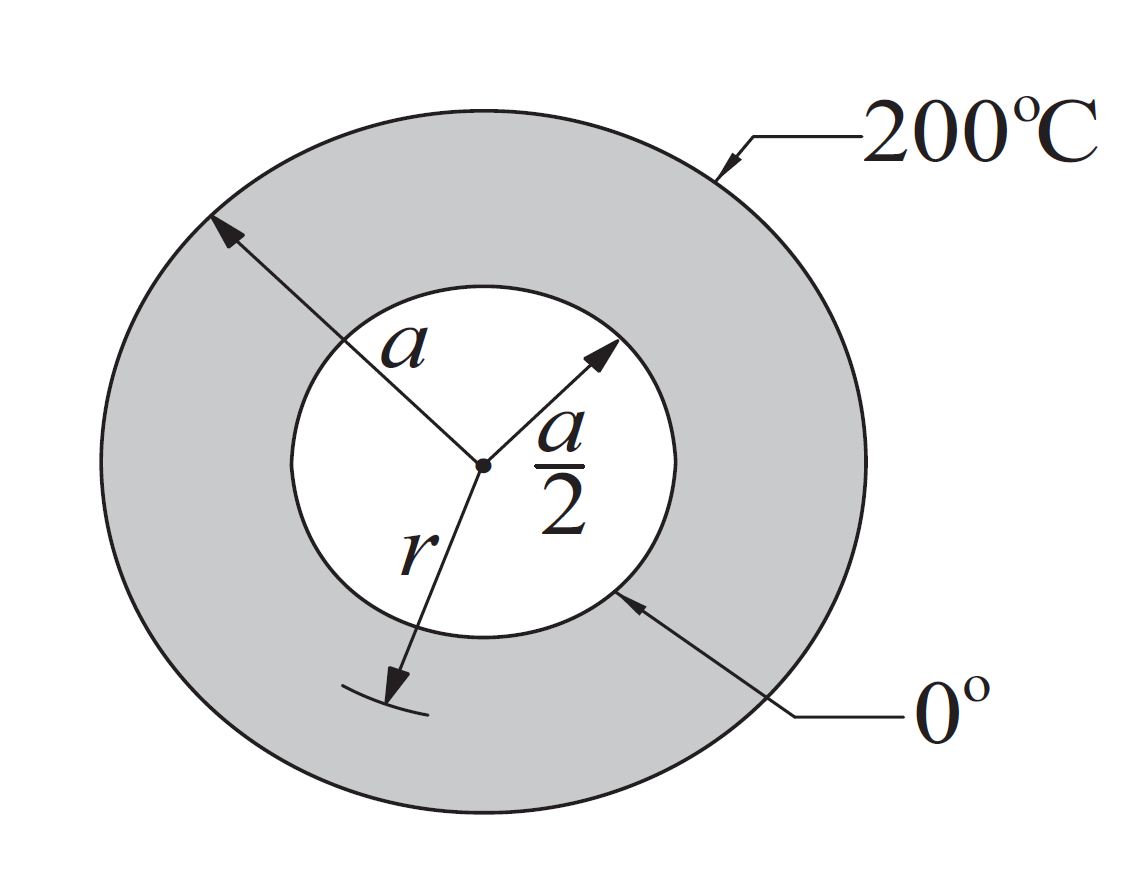

## a) Write out (don't code it yet) an appropriate timestepping scheme and explain your choice and any considerations.
{Answer}




We discretize the radial domain $r \in [a/2,\, a]$ into nodes
$$
r_j = \frac{a}{2} + j\,\Delta r, \qquad j = 0,1,\dots,N,
$$
and time into levels $t^n = n\,\Delta t$.

Using forward Euler in time and central differences in space for
$$
\frac{\partial T}{\partial t}
= \alpha\left( \frac{\partial^2 T}{\partial r^2}
+ \frac{1}{r}\frac{\partial T}{\partial r} \right),
$$
the update for interior nodes $j = 1,\dots,N-1$ is
$$
T_j^{n+1}
= T_j^{n}
+ \alpha \Delta t \left[
\frac{T_{j+1}^{n} - 2T_j^{n} + T_{j-1}^{n}}{\Delta r^2}
+ \frac{1}{2 r_j}\,\frac{T_{j+1}^{n} - T_{j-1}^{n}}{2\Delta r}
\right].
$$

Boundary and initial conditions:
$$
T_0^{n} = 0^\circ\text{C}, \qquad
T_N^{n} = 200^\circ\text{C}, \qquad
T_j^{0} = 200^\circ\text{C}.
$$

This is an explicit scheme (forward Euler), which is simple to implement but
requires a sufficiently small time step for stability, on the order of
$$
\Delta t \lesssim \frac{\Delta r^2}{2\alpha}.
$$


## b) Code your scheme and determine when you will reach steady state to within 1%
{method, steady state check, answer}

$$\|\frac{T(t)-T(t=\infty)}{T(t=\infty)}\|_2 = 0.01$$

In [16]:
import numpy as np
import math

# --- parameters (set a and alpha to whatever the assignment gives) ---
alpha = 1.0        # thermal diffusivity (non-dimensionalised here)
a = 1.0            # outer radius (non-dimensional)
T_in = 0.0         # inner BC
T_out = 200.0      # outer BC

# grid
N = 200
r0, r1 = a/2, a
dr = (r1 - r0) / N
r = np.linspace(r0, r1, N+1)

# initial condition: pipe is uniform at 200°C
T = np.full_like(r, T_out)
T[0] = T_in
T[-1] = T_out

# steady-state solution T_inf(r) = C1 ln r + C2
rin, rout = r0, r1
C1 = (T_out - T_in) / (math.log(rout) - math.log(rin))
C2 = T_in - C1 * math.log(rin)
T_inf = C1 * np.log(r) + C2

# explicit timestep (stability)
dt = 0.4 * dr**2 / alpha  # 0.4 < 0.5 for safety

def rel_L2(T):
    # relative L2 norm of (T - T_inf)/T_inf, ignoring the inner node where T_inf=0
    diff = (T[1:] - T_inf[1:]) / T_inf[1:]
    return np.sqrt(np.sum(diff**2 * dr) / (r1 - r0))

tol = 0.01   # 1% in L2
t = 0.0
err = rel_L2(T)

while err > tol:
    T_new = T.copy()
    for j in range(1, N):
        rj = r[j]
        d2T = (T[j+1] - 2*T[j] + T[j-1]) / dr**2
        dTdr = (T[j+1] - T[j-1]) / (2*dr)
        T_new[j] = T[j] + alpha * dt * (d2T + (1.0/rj) * dTdr)

    # enforce BCs
    T_new[0] = T_in
    T_new[-1] = T_out

    T = T_new
    t += dt
    err = rel_L2(T)

print("Time to reach steady state (within 1%) =", t)


Time to reach steady state (within 1%) = 0.11662000000008144
